# WIKIPEDIA SCRAPPER
This workbook demonstrates the following,
1. Scrapping static pages such as wikipedia and create an automatic scrapper given the link to the page.  

2. Using **Selenium** to load javascript heavy pages unlike **Beautiful Soup** that parses and pulls raw html content from static webpages.  

3. Create **AUTOMATIC SCRAPPER** using combination of Selenium & Beautiful Soup that scrapes any website with an attempt to navigate around **CAPTCHA** verifications that prevents automatic web browsing.


In [582]:
url="https://en.wikipedia.org/wiki/Cristiano_Ronaldo"

import requests
import os
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup

In [583]:
res=requests.get(url)
print(res.status_code)

200


In [584]:
soup=BeautifulSoup(res.text,'lxml')
print(soup.prettify())

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Cristiano Ronaldo - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conte

HTML parser error : Tag footer invalid
<footer id="footer" class="mw-footer" >
                                      ^
HTML parser error : Tag nav invalid
				<nav aria-label="Contents" class="vector-toc-landmark">
				                                                      ^


### EXTRACT INFORMATION
All information regards to Christiano Ronaldo is retrieved.

NOTE:
There exists a difference between **string** & **text** and they are,
1. **string** - is to be used iff within a tag there exists no nested tags and contain only one string. Returns **None** if there exists no string.
2. **text** - Retrieves all text within a tag even if it contains nested ones. In case of nested tags with string it concatenates all. Return **''** in the event there exists no string.

Also presence of **NBSP** is common in which case it must be replaced using **.replcae('\xa0','')**.

In [585]:
info={}

for idx,item in enumerate(soup.find('table',attrs={'class':'infobox'}).find_all('tr')):

    if idx==0:
        name=str(soup.find('caption',attrs={'class':'infobox-title'}).string).strip().replace('\xa0','')
        info[name]={}
    #iterate table body to capture all relevant info
    else:
        if item.find('th'):
            if item.find('td') is None:
                info_title=str(item.find('th').text).strip().replace('\xa0','')
                info[name][info_title]={}
            else:
                info_title_item=str(item.find('th').text).strip().replace('\xa0','')
                info[name][info_title][info_title_item]=str(item.find('td').text).strip().replace('\xa0','')

In [586]:
info

{'Cristiano Ronaldo': {'Personal information': {'Full name': 'Cristiano Ronaldo dos Santos Aveiro[1]',
   'Date of birth': '(1985-02-05) 5 February 1985 (age40)[2]',
   'Place of birth': 'Funchal, Madeira, Portugal',
   'Height': '1.87m (6ft 2in)[note 1]',
   'Position(s)': 'Forward'},
  'Team information': {'Current team': 'Al Nassr', 'Number': '7'},
  'Youth career': {'1992–1995': 'Andorinha',
   '1995–1997': 'Nacional',
   '1997–2002': 'Sporting CP'},
  'Senior career*': {'Years': 'Team',
   '2002–2003': 'Sporting CP',
   '2003–2009': 'Manchester United',
   '2009–2018': 'Real Madrid',
   '2018–2021': 'Juventus',
   '2021–2022': 'Manchester United',
   '2023–': 'Al Nassr'},
  'International career‡': {'2001': 'Portugal U15',
   '2001–2002': 'Portugal U17',
   '2003': 'Portugal U20',
   '2002–2003': 'Portugal U21',
   '2004': 'Portugal U23',
   '2003–': 'Portugal',
   "Medal record\n\n\n\n\n\n\nMen's football\n\n\nRepresenting Portugal\n\n\nUEFA European Championship\n\n\nWinner\n201

### SCRAPING DATA OF MAHATMA GANDHI FROM WIKIPEDIA

In [587]:
url_mahatma='https://en.wikipedia.org/wiki/Mahatma_Gandhi'
# response=requests.get(url2)
# response.status_code

Note that while **Scrapping** one may come across **ZWSP** which is **Zero Width Spaces** that signifies potential line breaks in docs such that the doc remains **reflowable** i.e. adapts its text to changing screen sizes. **ZWSP** are typical line breaks at word boundaries but without hyphenation. **ZWSP** is indicated by **\u200b** when scrapping a doc and needs removal.

The following **ScrapeData** function created assumes that picture of whoever the data is pulled of follows the name in the table on the wiki page.

In [588]:

def ScrapeData(url):
    response=requests.get(url)
    response.status_code
    info_title=""
    prev_info_title=""

    if response.status_code==200:
        soup=BeautifulSoup(response.text,'lxml')
        name=""
        idx=0

        for item in soup.find('table',attrs={'class':'infobox'}).find_all('tr'):
            if idx==0:
                if item.find('th'):
                    name=str(item.find('th').text).strip().replace('\xa0','')
                else:
                    name=url.split('/')[-1]
                    idx+=1
                info[name]={}
            elif idx>1:
                if item.find('th'):
                    info_title=str(item.find('th').text).strip().replace('\xa0','').replace('\u200b','').replace('\n',' ')
                    if item.find('td'):
                        if item.find('ul') is None:
                            info[name][info_title]={}
                            info[name][info_title]=str(item.find('td').text).strip().replace('\xa0','').replace('\u200b','').replace('\n',' ')
                        else:
                            info[name][info_title]=[]

                            for element in item.find_all('li'):
                                info[name][info_title].append(str(element.text).strip().replace('\xa0','').replace('\u200b','').replace('\n',' '))
                    else:
                        info[name][info_title]={}
                        prev_info_title=info_title
                elif item.find('td'):
                    info[name][prev_info_title]=str(item.find('td').text).strip().replace('\xa0','').replace('\u200b','').replace('\n',' ')
            idx+=1
            

In [589]:
ScrapeData(url_mahatma)

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

In [590]:
info.keys()

dict_keys(['Cristiano Ronaldo', 'MahātmāGandhi'])

In [591]:
info['MahātmāGandhi']

{'Born': 'Mohandas Karamchand Gandhi(1869-10-02)2 October 1869Porbandar, Porbandar State, Kathiawar Agency, British India',
 'Died': '30 January 1948(1948-01-30) (aged78)New Delhi, Dominion of India',
 'Causeof death': 'Assassination',
 'Monuments': ['Raj Ghat, Delhi', 'Gandhi Smriti, New Delhi'],
 'Othernames': 'Bāpū (father), Rāṣṭrapitā (the Father of the Nation)',
 'Citizenship': ['British Raj (until 1947)', 'Dominion of India (from 1947)'],
 'Almamater': ['Samaldas Arts College[a]', 'University College London[b]'],
 'Occupations': ['Lawyer', 'anti-colonialist', 'political ethicist'],
 'Yearsactive': '1893–1948',
 'Knownfor': ["Leadership of the campaign for India's independence from British rule",
  'Nonviolent resistance'],
 'Political party': 'Indian National Congress (1920–1934)',
 'Spouse': 'Kasturba Gandhi  (m.1883; died1944)',
 'Children': ['Harilal', 'Manilal', 'Ramdas', 'Devdas'],
 'Parents': ['Karamchand Gandhi', 'Putlibai Gandhi'],
 'Relatives': 'Gandhi family',
 '': '',


In [592]:
def Clean_info(name):
    to_remove=[]

    for info_title in info[name]:
        if len(info[name][info_title])==0:
            to_remove.append(info_title)
    
    for item in to_remove:
        info[name].pop(item,None)
    
    return info

In [593]:
info=Clean_info('MahātmāGandhi')

In [594]:
info['MahātmāGandhi']

{'Born': 'Mohandas Karamchand Gandhi(1869-10-02)2 October 1869Porbandar, Porbandar State, Kathiawar Agency, British India',
 'Died': '30 January 1948(1948-01-30) (aged78)New Delhi, Dominion of India',
 'Causeof death': 'Assassination',
 'Monuments': ['Raj Ghat, Delhi', 'Gandhi Smriti, New Delhi'],
 'Othernames': 'Bāpū (father), Rāṣṭrapitā (the Father of the Nation)',
 'Citizenship': ['British Raj (until 1947)', 'Dominion of India (from 1947)'],
 'Almamater': ['Samaldas Arts College[a]', 'University College London[b]'],
 'Occupations': ['Lawyer', 'anti-colonialist', 'political ethicist'],
 'Yearsactive': '1893–1948',
 'Knownfor': ["Leadership of the campaign for India's independence from British rule",
  'Nonviolent resistance'],
 'Political party': 'Indian National Congress (1920–1934)',
 'Spouse': 'Kasturba Gandhi  (m.1883; died1944)',
 'Children': ['Harilal', 'Manilal', 'Ramdas', 'Devdas'],
 'Parents': ['Karamchand Gandhi', 'Putlibai Gandhi'],
 'Relatives': 'Gandhi family',
 'Preside

### ADDING ABOUT SECTION
About section that contains detailed text in the wikipedia page is captured.

In [595]:
def Add_about_section(url,name):
    res=requests.get(url)

    if res.status_code==200:
        soup=BeautifulSoup(res.text,'lxml')

        for item in soup.find_all('p'):
            if 'About' not in info[name]:
                info[name]['About']=''
            info[name]['About']+=item.text.replace('\n\n','').replace('\xa0','').replace('\u200b','')
            info[name]['About'].strip()
    return info

In [596]:
info=Add_about_section(url_mahatma,'MahātmāGandhi')

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

In [597]:
info['MahātmāGandhi']

{'Born': 'Mohandas Karamchand Gandhi(1869-10-02)2 October 1869Porbandar, Porbandar State, Kathiawar Agency, British India',
 'Died': '30 January 1948(1948-01-30) (aged78)New Delhi, Dominion of India',
 'Causeof death': 'Assassination',
 'Monuments': ['Raj Ghat, Delhi', 'Gandhi Smriti, New Delhi'],
 'Othernames': 'Bāpū (father), Rāṣṭrapitā (the Father of the Nation)',
 'Citizenship': ['British Raj (until 1947)', 'Dominion of India (from 1947)'],
 'Almamater': ['Samaldas Arts College[a]', 'University College London[b]'],
 'Occupations': ['Lawyer', 'anti-colonialist', 'political ethicist'],
 'Yearsactive': '1893–1948',
 'Knownfor': ["Leadership of the campaign for India's independence from British rule",
  'Nonviolent resistance'],
 'Political party': 'Indian National Congress (1920–1934)',
 'Spouse': 'Kasturba Gandhi  (m.1883; died1944)',
 'Children': ['Harilal', 'Manilal', 'Ramdas', 'Devdas'],
 'Parents': ['Karamchand Gandhi', 'Putlibai Gandhi'],
 'Relatives': 'Gandhi family',
 'Preside

In [598]:
print(info['MahātmāGandhi']['About'])


Mohandas Karamchand Gandhi[c] (2October 1869– 30January 1948)[2] was an Indian lawyer, anti-colonial nationalist, and political ethicist who employed nonviolent resistance to lead the successful campaign for India's independence from British rule. He inspired movements for civil rights and freedom across the world. The honorific Mahātmā (from Sanskrit, meaning great-souled, or venerable), first applied to him in South Africa in 1914, is now used throughout the world.[3]
Born and raised in a Hindu family in coastal Gujarat, Gandhi trained in the law at the Inner Temple in London and was called to the bar at the age of 22. After two uncertain years in India, where he was unable to start a successful law practice, Gandhi moved to South Africa in 1893 to represent an Indian merchant in a lawsuit. He went on to live in South Africa for 21 years. Here, Gandhi raised a family and first employed nonviolent resistance in a campaign for civil rights. In 1915, aged 45, he returned to India and s

In [599]:
info=Add_about_section(url,'Cristiano Ronaldo')

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

In [600]:
print(info['Cristiano Ronaldo']['About'])




Cristiano Ronaldo dos Santos Aveiro GOIH ComM (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu] ⓘ; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for and captains both the Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players of all time, Ronaldo has won numerous individual accolades throughout his career, such as five Ballon d'Or awards, a record three UEFA Men's Player of the Year Awards, four European Golden Shoes, and was named five times the world's best player by FIFA,[note 3] the most by a European player. He has won 33 trophies in his career, including seven league titles, five UEFA Champions Leagues, the UEFA European Championship and the UEFA Nations League. Ronaldo holds the records for most appearances (183), goals (140) and assists (42) in the Champions League, most appearances (30), assists (8), goals in the European Championship (14), international appearances (217) and intern

### OBTAIN DATA FOR MARTIN LUTHER KING JR.

In [601]:
url_martin="https://en.wikipedia.org/wiki/Martin_Luther_King_Jr."

In [602]:
ScrapeData(url_martin)

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

In [603]:
info.keys()

dict_keys(['Cristiano Ronaldo', 'MahātmāGandhi', 'The ReverendMartin Luther King Jr.'])

In [604]:
info=Clean_info('The ReverendMartin Luther King Jr.')

In [605]:
info['The ReverendMartin Luther King Jr.']

{'Preceded by': 'Position established',
 'Succeeded by': 'Ralph Abernathy',
 'Born': 'Michael King Jr.(1929-01-15)January 15, 1929Atlanta, Georgia, U.S.',
 'Died': 'April 4, 1968(1968-04-04) (aged39)Memphis, Tennessee, U.S.',
 'Mannerofdeath': 'Assassination by gunshot',
 'Resting place': 'Martin Luther KingJr. National Historical Park',
 'Spouse': 'Coretta Scott (m.1953)',
 'Children': ['Yolanda', 'MartinIII', 'Dexter', 'Bernice'],
 'Parents': ['Martin Luther King Sr.', 'Alberta Williams King'],
 'Relatives': ['Christine King Farris (sister)',
  'A.D. King (brother)',
  'Alveda King (niece)'],
 'Education': ['Morehouse College (BA)',
  'Crozer Theological Seminary (BDiv)',
  'Boston University (PhD)'],
 'Occupation': ['Baptist minister', 'activist'],
 'Monuments': 'Full list',
 'Movement': ['Civil rights', 'peace', 'anti-war'],
 'Awards': ['Nobel Peace Prize (1964)',
  'Presidential Medal of Freedom (posthumous, 1977)',
  'Congressional Gold Medal (posthumous, 2004)'],
 'Nickname': 'M

In [606]:
info=Add_about_section(url_martin,'The ReverendMartin Luther King Jr.')

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

In [607]:
print(info['The ReverendMartin Luther King Jr.']['About'])


Campaigns
Death and memorial
Martin Luther King Jr. (born Michael King Jr.; January 15, 1929– April 4, 1968) was an American Baptist minister, activist, and political philosopher who was one of the most prominent leaders in the civil rights movement from 1955 until his assassination in 1968. King advanced civil rights for people of color in the United States through the use of nonviolent resistance and nonviolent civil disobedience against Jim Crow laws and other forms of legalized discrimination.
A black church leader, King participated in and led marches for the right to vote, desegregation, labor rights, and other civil rights.[1] He oversaw the 1955 Montgomery bus boycott and later became the first president of the Southern Christian Leadership Conference (SCLC). As president of the SCLC, he led the unsuccessful Albany Movement in Albany, Georgia, and helped organize some of the nonviolent 1963 protests in Birmingham, Alabama. King was one of the leaders of the 1963 March on Washi

### PULL INFO ABOUT SACHIN TENDULKAR

In [608]:
url_sachin="https://en.wikipedia.org/wiki/Sachin_Tendulkar"
ScrapeData(url_sachin)

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

In [609]:
info.keys()

dict_keys(['Cristiano Ronaldo', 'MahātmāGandhi', 'The ReverendMartin Luther King Jr.', 'Sachin_Tendulkar'])

In [610]:
info=Clean_info('Sachin_Tendulkar')

In [611]:
info=Add_about_section(url_sachin,'Sachin_Tendulkar')

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

In [612]:
print(info['Sachin_Tendulkar']['About'])


Eponyms
In Media
Books
People

Sachin Ramesh Tendulkar (/ˌsʌtʃɪn tɛnˈduːlkər/ ⓘ; pronounced [sətɕin teːɳɖulkəɾ]; born 24 April 1973) is an Indian former international cricketer who captained the Indian national team. He is widely regarded as one of the greatest cricketers of all time,[5] and is the holder of several world records, including being the all-time highest run-scorer in both ODI and Test cricket,[6] receiving the most player of the match awards in international cricket,[7] and being the only batsman to score 100 international centuries.[8] Tendulkar was a Member of Parliament, Rajya Sabha by presidential nomination from 2012 to 2018.[9][10]
Tendulkar took up cricket at the age of eleven, made his Test match debut on 15 November 1989 against Pakistan in Karachi at the age of sixteen, and went on to represent Mumbai domestically and India internationally for over 24 years.[11] In 2002, halfway through his career, Wisden ranked him the second-greatest Test batsman of all time,

In [613]:
info['Sachin_Tendulkar']

{'Fullname': 'Sachin Ramesh Tendulkar',
 'Born': '(1973-04-24) 24 April 1973 (age51)Bombay, Maharashtra, India(now Mumbai, India)',
 'Nickname': ['Little Master', 'Master Blaster'],
 'Height': '165cm (5ft 5in)',
 'Batting': 'Right-handed',
 'Bowling': ['Right-arm leg break', 'Right-arm off break'],
 'Role': 'Top order Batter',
 'Relations': ['Ramesh Tendulkar (father)', 'Arjun Tendulkar (son)'],
 'Website': 'sachintendulkar.com',
 'National side': ['India (1989–2013)'],
 'Test debut (cap187)': '15 November 1989vPakistan',
 'Last Test': '14 November 2013vWest Indies',
 'ODI debut (cap74)': '18 December 1989vPakistan',
 'Last ODI': '18 March 2012vPakistan',
 'ODI shirt no.': '10 (formerly 99, 33)',
 'Only T20I (cap11)': '1 December 2006vSouth Africa',
 'T20I shirt no.': '10',
 '1988–2013': 'Mumbai',
 '1992': 'Yorkshire',
 '1994': 'East Bengal[3]',
 '2008–2013': 'Mumbai Indians (squadno.10)',
 'Matches': '200',
 'Runs scored': '15,921',
 'Batting average': '53.78',
 '100s/50s': '51/68',
 

#### OBTAIN INFO OF SOURAV GANGULY

In [614]:
url_sourav="https://en.wikipedia.org/wiki/Sourav_Ganguly"
ScrapeData(url_sourav)

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

In [615]:
info.keys()

dict_keys(['Cristiano Ronaldo', 'MahātmāGandhi', 'The ReverendMartin Luther King Jr.', 'Sachin_Tendulkar', 'Sourav Ganguly'])

In [616]:
info=Clean_info('Sourav Ganguly')
info=Add_about_section(url_sourav,'Sourav Ganguly')

HTML parser error : Tag header invalid
	<header class="vector-header mw-header">
	                                       ^
HTML parser error : Tag nav invalid
			<nav class="vector-main-menu-landmark" aria-label="Site">
			                                                        ^
HTML parser error : Tag nav invalid
nav class="vector-user-links vector-user-links-wide" aria-label="Personal tools"
                                                                               ^
HTML parser error : Tag nav invalid
	<nav class="vector-appearance-landmark" aria-label="Appearance">
	                                                               ^
HTML parser error : Tag nav invalid
			<nav id="mw-panel" class="vector-main-menu-landmark" aria-label="Site">
			                                                                      ^
HTML parser error : Tag nav invalid
name="ui.sidebar-toc" class="mw-table-of-contents-container vector-toc-landmark"
                                                  

In [617]:
info['Sourav Ganguly']

{"Chairman of the ICC Men's Cricket Committee": 'Assumed office 17 November 2021',
 'Preceded by': 'Jagmohan Dalmiya',
 '35th President of the Board of Control for Cricket in India': 'In office23 October 2019– 18 October 2022',
 'Succeeded by': 'Avishek Dalmiya',
 '16th President of the Cricket Association of Bengal': 'In office2015–2019',
 'Fullname': 'Sourav Chandidas Ganguly',
 'Born': '(1972-07-08) 8 July 1972 (age52)Behala, Calcutta, West Bengal, India',
 'Nickname': 'Dada, Prince of Calcutta, Maharaj, Bengal Tiger',
 'Height': '1.80m (5ft 11in)',
 'Batting': 'Left-handed',
 'Bowling': 'Right-arm medium',
 'Role': 'Batsman',
 'Relations': 'Dona Ganguly (m.1997)Sana Ganguly (daughter)Snehasish Ganguly (brother)',
 'Website': 'souravganguly.co.in',
 'National side': ['India (1992–2008)'],
 'Test debut (cap206)': '20 June 1996vEngland',
 'Last Test': '6 November 2008vAustralia',
 'ODI debut (cap84)': '11 January 1992vWest Indies',
 'Last ODI': '15 November 2007vPakistan',
 'ODI shirt

#### GOOGLE SEARCH LINK GENERATOR
Here given a query on google of an illustrious person to get wikipedia details of it finds the wikipedia url and using it gathers all relevant information unlike before where a url of the wikipedia page is considered as input to help scrape data.

In [618]:
prefix="https://www.google.com/search?q="

In [619]:
def Get_Google_link_for_query():
    query=input('Enter your query to get wikipedia details about').replace(' ','+')
    google_link=prefix+query

    if 'wikipedia' not in google_link:
        google_link+='+wikipedia'
    return google_link


In [674]:
link=Get_Google_link_for_query()

In [675]:
link

'https://www.google.com/search?q=christiano+ronaldo+wikipedia'

#### USING SELENIUM TO SCRAPE DATA
Unlike **Beautiful Soup** which helps parse and pull html content from static pages **Selenium** with its use of **web drivers** parses and pulls data from any website (static & dynamic). **Selenium** is usually used to extract data from **java script** heavy sites such as Google,LinkedIn etc with dynamic content.  

**Web drivers** work as real-users to open up browser, type in a query ,click search button, navigate pages etc. They help automate web-browsing and pull data from dynamic and static sites. Since every content is picked **Selenium** which makes use of it works slower when compared to **Beautiful Soup**.

**WORKING**
1. Here at first **Selenium** is used to make use of **Chromedriver** to emulate real-user interaction through which any query is put in the searchbar of **Google** landing page and hit enter to display results.  

2. Usually browsers put **CAPTCHA (Completely Automated Public Turing Test to Tell Computers & Human Alike)** to detect bots from humans attempting to access their sites. This is considered line of defence against modifying website content and unauthorized scrapping.  

3. There exists a couple of ways to navigate around CAPTCHA's such as,
    (i) Implementing time delay to ensure actions look more human-like
    (ii) Manually solving CAPTCHA 
    (iii) Using 3rd Party CAPTCHA solvers integrated with **Selenium**.  

4. Once on the results page the wikipedia link is looked for and obtained.  

5. Then use **Beautiful Soup** if the link points to static website or **Selenium** otherwise to scrap relevant data.

In [651]:
from selenium import webdriver

In [686]:
import time
import random

In [714]:
browser=webdriver.Chrome()

In [708]:
link

'https://www.google.com/search?q=christiano+ronaldo+wikipedia'

In [715]:
browser.get("https://www.google.com")

In [716]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [717]:
google_searchbox=browser.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div[1]/div[2]/textarea")
google_searchbox.clear()
google_searchbox.send_keys("gandhi ji")
google_searchbox.send_keys(Keys.RETURN)

browser.implicitly_wait(10)

'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta charset="UTF-8"><meta content="dark light" name="color-scheme"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>gandhi ji - Google Search</title><script nonce="">window._hst=Date.now();</script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'It2kZ9iDJ5GfseMP0Mrp8Q8\',kEXPI:\'31\',kBL:\'dyC8\',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'en-IN\';})();(function(){\nvar g=this||self;function k(){return window.google&&window.google.kOPI||null};var l,m=[];function n(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||l}function p(a){for(var b=n
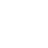
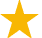
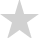
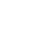
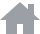
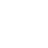
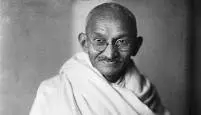
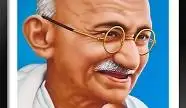
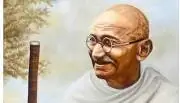
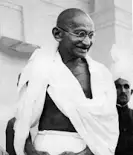
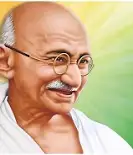
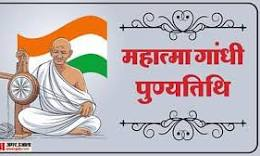
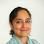
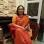
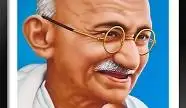
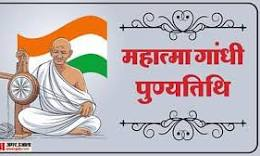
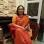
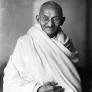
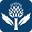
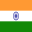
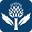
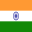
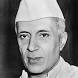
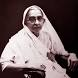
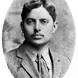
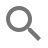
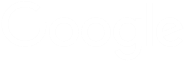
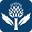
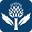

In [718]:
browser.page_source

<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN">
 <head>
  <meta charset="utf-8"/>
  <meta content="dark light" name="color-scheme"/>
  <meta content="origin" name="referrer"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   gandhi ji - Google Search
  </title>
  <script nonce="">
   window._hst=Date.now();
  </script>
  <script nonce="">
   (function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'It2kZ9iDJ5GfseMP0Mrp8Q8',kEXPI:'31',kBL:'dyC8',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en-IN';})();(function(){
var g=this||self;function k(){return window.google&&window.google.kOPI||null};var l,m=[];function n(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;retu
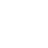
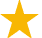
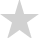
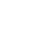
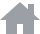
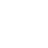
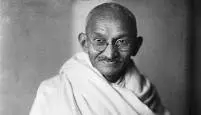
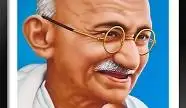
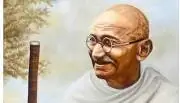
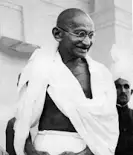
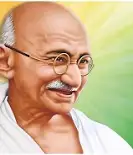
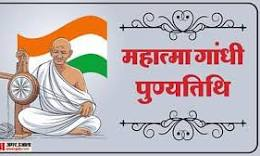
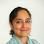
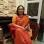
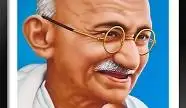
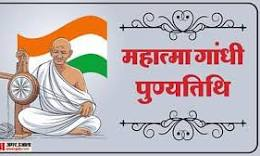
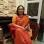
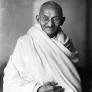
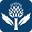
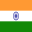
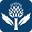
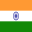
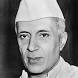
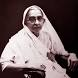
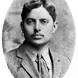
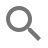
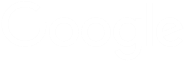
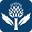
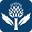

HTML parser error : Tag svg invalid
vg height="30" viewBox="0 0 92 30" width="92" xmlns="http://www.w3.org/2000/svg"
                                                                               ^
HTML parser error : Tag path invalid
.66l6.5-2.74c-.36-.92-1.43-1.57-2.7-1.57-1.62 0-3.88 1.46-3.8 4.31z" fill="#FFF"
                                                                               ^
HTML parser error : Tag svg invalid
th="24" focusable="false" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"
                                                                               ^
HTML parser error : Tag path invalid
12v4.51h6.47c-.29 1.48-1.14 2.73-2.4 3.58v3h3.86c2.26-2.09 3.56-5.17 3.56-8.82z"
                                                                               ^
HTML parser error : Tag path invalid
45 1.16-4.07 1.16-3.13 0-5.78-2.11-6.73-4.96H1.29v3.09C3.26 21.3 7.31 24 12 24z"
                                                                               ^
HTML pa

In [719]:
soup = BeautifulSoup(browser.page_source,'lxml')
print(soup.prettify())

In [720]:
gandhi_wiki_link=soup.find('div',attrs={'id':'search'}).find('a')['href']

In [721]:
gandhi_wiki_link

'https://en.wikipedia.org/wiki/Mahatma_Gandhi'

In [722]:
browser.quit()

### NAVIGATING AROUND CAPTCHA
While CAPTCHA used by **Google** search engines help detect bots from accessing pages and modify contents and plays a pivotal role while testing automatic browing using **Web Drivers** and coming across such verifications defeats the very purpose of the task.

There exists several ways to get around CAPTCHA. Since it is through browsing behaviour that **Google** detects presence of bot or human interaction getting around CAPTCHA means mimicking real human like actions some of which are:  

(i) Applying delays between actions such as keying in queries on search bar followed by searching, navigation etc.  

(ii) **Selenium Web Drivers** usually leave footprints in the browser that makes it easy for search engines to detect presence of bot and pop up CAPTCHAs. Hence using **Undetected Web Drivers** such as **undetected Selenium Web Drivers** or **Playwright** helps to get around the issue.  

(iii) Changing IP to use **VPN or Other Proxy Settings**

#### ADDING TIME DELAYS

In [728]:
browser=webdriver.Chrome()

In [729]:
browser.get("https://www.google.com")
time.sleep(random.uniform(3,8))

search_box=browser.find_element("name","q")
search_box.send_keys("Fifa World cup 2026")
time.sleep(random.uniform(3,8))

search_box.send_keys(Keys.ENTER)

browser.implicitly_wait(10)

**Google** **CAPTCHA**s & **reCAPTCHA**s are found in a webpage embedded within the parent webpage wrapped by **iframe** tag. Inorder to interact with CAPTCHA the **Web Driver** must move over to the page containing CAPTCHA, interact and then move back to the default page.

In [730]:
captcha_iframe=browser.find_element(By.TAG_NAME,"iframe")
browser.switch_to.frame(captcha_iframe)

#set time delay
time.sleep(random.uniform(3,8))

#click the captcha checkbox
checkbox=browser.find_element("id","recaptcha-anchor")
checkbox.click()

In [731]:
#switch web driver to default content which in this case is the parent page that houses the page which holds CAPTCHA
browser.switch_to.default_content()

In [732]:
browser.title

'Fifa World cup 2026 - Google Search'